In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE322(ML & DM L)/Titanic-Toy.csv')
df

,Survived,Age,Parch,Fare
0,0,22.0,0,7.2500
1,1,38.0,0,71.2833
2,1,26.0,0,7.9250
3,1,35.0,0,53.1000
4,0,35.0,0,8.0500
...,...,...,...,...
886,0,27.0,0,13.0000
887,1,19.0,0,30.0000
888,0,NaN,2,23.4500
889,1,26.0,0,30.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Parch     891 non-null    int64  
 3   Fare      847 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Parch       0.000000
Fare        0.049383
dtype: float64

In [ ]:
x = df.drop(['Survived'],1)
y = df.Survived

<ipython-input-7-45bd7f8103c6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['Survived'],1)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [ ]:
x_train.isnull().mean()

Age      0.207865
Parch    0.000000
Fare     0.044944
dtype: float64

In [ ]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare= x_train['Fare'].median()

In [ ]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_age)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [ ]:
x_train.sample(5)

,Age,Parch,Fare,Age_median,Age_mean,Fare_median,Fare_mean
263,40.0,0,0.00,40.00,40.000000,0.00,0.000000
750,4.0,1,23.00,4.00,4.000000,23.00,23.000000
454,NaN,0,8.05,28.75,29.785904,8.05,8.050000
218,32.0,0,NaN,32.00,32.000000,28.75,32.714711
23,28.0,0,NaN,28.00,28.000000,28.75,32.714711


In [ ]:
print('Orginal Age variable variance: ',x_train['Age'].var())
print('Age Variance after median imputation: ',x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Orgianl fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare variance after mean imputation: ', x_train['Fare_mean'].var())

Orginal Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Orgianl fare variable variance:  2450.422335400104
Fare Variance after median imputation:  2340.8117647138247
Fare variance after mean imputation:  2340.1360980825184


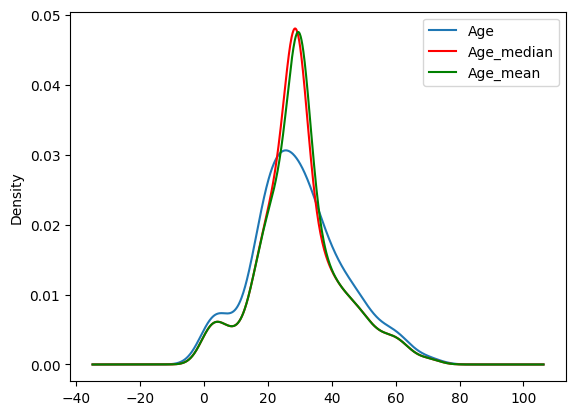

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orginal variable distrubution
x_train['Age'].plot(kind = 'kde', ax = ax)

#Variable imputed with the mdian
x_train['Age_median'].plot(kind = 'kde', ax=ax, color = 'red')

#Variable imputed with the mean:
x_train['Age_mean'].plot(kind = 'kde', ax=ax, color = 'green')

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

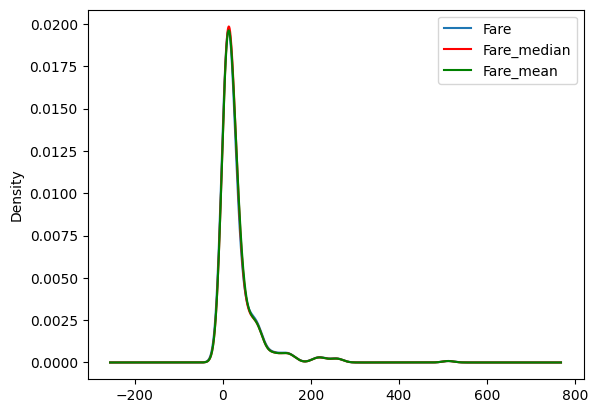

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orginal variable distrubution
x_train['Fare'].plot(kind = 'kde', ax = ax)

#Variable imputed with the mdian
x_train['Fare_median'].plot(kind = 'kde', ax=ax, color = 'red')

#Variable imputed with the mean:
x_train['Fare_mean'].plot(kind = 'kde', ax=ax, color = 'green')

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

In [ ]:
x_train.cov()

,Age,Parch,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,-2.333618,71.675938,204.349513,204.349513,69.406058,68.735512
Parch,-2.333618,0.708695,8.638365,-1.800826,-1.847858,8.272070,8.249577
Fare,71.675938,8.638365,2450.422335,59.400080,56.992773,2450.422335,2450.422335
Age_median,204.349513,-1.800826,59.400080,161.989566,161.812625,57.248085,56.726659
Age_mean,204.349513,-1.847858,56.992773,161.812625,161.812625,54.958665,54.427698
Fare_median,69.406058,8.272070,2450.422335,57.248085,54.958665,2340.811765,2340.136098
Fare_mean,68.735512,8.249577,2450.422335,56.726659,54.427698,2340.136098,2340.136098


In [ ]:
x_train.corr()

,Age,Parch,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,-0.182537,0.093527,1.000000,1.000000,0.093539,0.092666
Parch,-0.182537,1.000000,0.205238,-0.168073,-0.172557,0.203096,0.202573
Fare,0.093527,0.205238,1.000000,0.093643,0.089913,1.000000,1.000000
Age_median,1.000000,-0.168073,0.093643,1.000000,0.999454,0.092968,0.092135
Age_mean,1.000000,-0.172557,0.089913,0.999454,1.000000,0.089299,0.088449
Fare_median,0.093539,0.203096,1.000000,0.092968,0.089299,1.000000,0.999856
Fare_mean,0.092666,0.202573,1.000000,0.092135,0.088449,0.999856,1.000000


<Axes: >

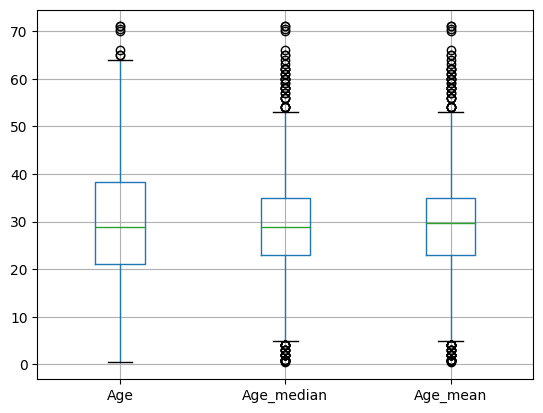

In [ ]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

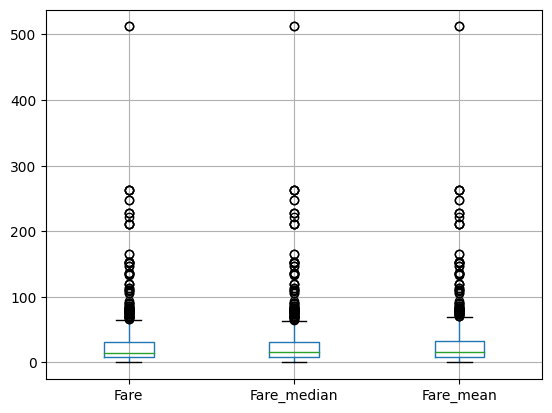

In [ ]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

Using Sklearn:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.71471147])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   1.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])